In [1]:
import cv2
import os

In [2]:
data_path = 'dataset'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]

label_dict = dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


# Data Pre-Processing

In [3]:
img_size = 100
data = []
target = []


for category in categories:
    folder_path = os.path.join(data_path,category)
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path,img_name)
        img = cv2.imread(img_path)
        
        try:
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            # converting the image into grayscale
            resized = cv2.resize(gray,(img_size,img_size))
            #resizing the grayscale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception is raised, the exception will be printed here.

In [4]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [5]:
np.save('data',data)
np.save('target',new_target)

# Training the CNN

In [6]:
#loading of the saved numpy arrays in the previous code
data = np.load('data.npy')
target = np.load('target.npy')

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# The first CNN Layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# The second CNN Layer followed by Relu and MaxPooling layers

# Flatten layer used to stack the output convolutions from the second convolution layer
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))
# The final layer with two outputs for two categories

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [9]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model', monitor='val_loss', verbose=0,save_best_only=True,mode='auto')

history=model.fit(train_data,train_target,epochs=10,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/10
72/72 [==============================] - 221s 3s/step - loss: 0.5788 - accuracy: 0.6913 - val_loss: 0.5118 - val_accuracy: 0.7465
Epoch 2/10
72/72 [==============================] - 187s 3s/step - loss: 0.3883 - accuracy: 0.8378 - val_loss: 0.3505 - val_accuracy: 0.8304
Epoch 3/10
72/72 [==============================] - 188s 3s/step - loss: 0.2621 - accuracy: 0.8881 - val_loss: 0.2922 - val_accuracy: 0.8619
Epoch 4/10
72/72 [==============================] - 184s 3s/step - loss: 0.1996 - accuracy: 0.9239 - val_loss: 0.2447 - val_accuracy: 0.8881
Epoch 5/10
72/72 [==============================] - 188s 3s/step - loss: 0.1549 - accuracy: 0.9432 - val_loss: 0.3371 - val_accuracy: 0.8759
Epoch 6/10
72/72 [==============================] - 190s 3s/step - loss: 0.1269 - accuracy: 0.9528 - val_loss: 0.2525 - val_accuracy: 0.8916
Epoch 7/10
72/72 [==============================] - 191s 3s/step - loss: 0.1152 - accuracy: 0.9537 - val_loss: 0.2202 - val_accuracy: 0.9196
Epoch 8/10
72

In [10]:
import matplotlib.pyplot as plt

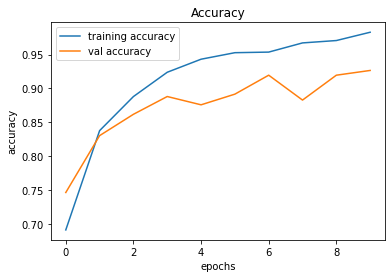

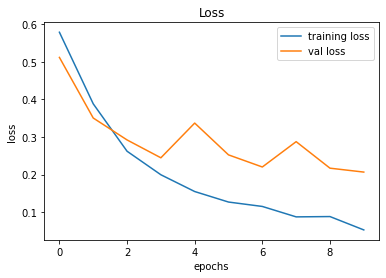

In [11]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
print(model.evaluate(test_data,test_target))

10/10 [==============================] - 6s 635ms/step - loss: 0.1610 - accuracy: 0.9434
[0.16102935373783112, 0.9433962106704712]
